In [1]:
from IPython.display import HTML

style = """
<style>
#header, div.unselected { display: none !important }
#notebook, .container { padding: 1 !important }
#site { height: 100% !important }
</style>
"""
style = "" # Comment to turn on

HTML(style)

In [2]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import json
import random as rd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn import set_config
set_config(display='diagram')
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
def colect_multichoice(collect, json_text):
    target = ''
    for i in range(10):
        try:
            target = target + json_text[f'{collect}'][i]['name'] + ','
        except IndexError:
            break
    target = target[:-1]
    return target

In [4]:
def collect_infor_anime(anime_file, sleep_time):
    title = 'title'
    source = 'source'
    episodes = 'episodes'
    duration = 'duration'
    rating = 'rating'
    score = 'score'
    scored_by = 'scored_by'
    producers = 'producers'
    studios = 'studios'
    genres = 'genres'
    favorites = 'favorites'
    f = open(anime_file, 'w', encoding='utf-8')
    f.write(f'{title}\t{genres}\t{rating}\t{source}\t{episodes}\t{duration}\t{producers}\t{studios}\t{favorites}\t{score}\t{scored_by}\n')
    key = rd.randint(1,40)
    while True:
        producers = 'producers'
        studios = 'studios'
        genres = 'genres'
        try:
            url_run = f'https://api.jikan.moe/v3/anime/{key}'
            json_url=requests.get(url_run)
            json_text = json_url.json()
            while True:
                if(json_text['status'] != 404): break
                else:
                    key += rd.randint(1,15)
                    url_run = f'https://api.jikan.moe/v3/anime/{key}'
                    json_url=requests.get(url_run)
                    json_text = json_url.json()
            title = json_text['title']
            source = json_text['source']
            episodes = json_text['episodes']
            duration = json_text['duration']
            rating = json_text['rating']
            score = json_text['score']
            scored_by = json_text['scored_by']
            favorites = json_text['favorites']
            producers = colect_multichoice(producers, json_text)
            studios = colect_multichoice(studios, json_text)
            genres = colect_multichoice(genres, json_text)
        except KeyError:
            key += rd.randint(1,15)
            continue
        else:
            f.write(f'{title}\t{genres}\t{rating}\t{source}\t{episodes}\t{duration}\t{producers}\t{studios}\t{favorites}\t{score}\t{scored_by}\n')
            key += rd.randint(1,15)
            if (key >= 30000): break 
            time.sleep(sleep_time)
    f.close()
#collect_infor_anime('anime_rating_table', sleep_time = 3)

In [5]:
df = pd.read_csv('anime_rating_table',sep = '\t')
df

,title,genres,rating,source,episodes,duration,producers,studios,favorites,score,scored_by
0,Bouken Ou Beet,"Adventure,Fantasy,Shounen,Supernatural",PG - Children,Manga,52,23 min per ep,"TV Tokyo,Dentsu",Toei Animation,18,6.98,5324
1,Hungry Heart: Wild Striker,"Slice of Life,Comedy,Sports,Shounen",PG-13 - Teens 13 or older,Manga,52,23 min per ep,NaN,Nippon Animation,229,7.59,10620
2,Monster,"Drama,Horror,Mystery,Police,Psychological,Sein...",R+ - Mild Nudity,Manga,74,24 min per ep,"VAP,Shogakukan-Shueisha Productions,Nippon Tel...",Madhouse,28045,8.75,188661
3,One Piece,"Action,Adventure,Comedy,Super Power,Drama,Fant...",PG-13 - Teens 13 or older,Manga,None,24 min,"Fuji TV,TAP,Shueisha",Toei Animation,115607,8.5,696184
4,Texhnolyze,"Action,Sci-Fi,Psychological,Drama",R+ - Mild Nudity,Original,22,23 min per ep,"Group TAC,Rondo Robe,Fuji TV,Pioneer LDC",Madhouse,3595,7.76,39927
...,...,...,...,...,...,...,...,...,...,...,...
1236,Fukusuke,NaN,G - All Ages,Original,1,18 min,NaN,NaN,1,5.6,183
1237,Goman-hiki,Kids,G - All Ages,Unknown,100,3 min per ep,Otogi Production,NaN,0,None,None
1238,Tsuru no Ongaeshi,Kids,G - All Ages,Original,1,17 min,Gakken Eigakyoku,NaN,0,None,None
1239,Swimming,Dementia,G - All Ages,Unknown,1,4 min,NaN,NaN,0,5.44,125


In [6]:
def convert_dtypes(col):
    if (col.name in ['score','scored_by','episodes']):
        return pd.to_numeric(col, errors='coerce')
    elif col.name in 'duration':
        h_col = col.str.extract(r'(\d+) hr', expand=False)
        h_col = pd.to_numeric(h_col.fillna(0))
        m_col = col.str.extract(r'(\d+) min', expand=False)
        m_col = pd.to_numeric(m_col.fillna(0))
        return h_col * 60 + m_col
    return col
temp = df.apply(convert_dtypes)
df = temp

In [7]:
df.dropna(subset = ['score'], inplace = True)
df.set_index('title', inplace = True)
df

,genres,rating,source,episodes,duration,producers,studios,favorites,score,scored_by
title,,,,,,,,,,
Bouken Ou Beet,"Adventure,Fantasy,Shounen,Supernatural",PG - Children,Manga,52.0,23,"TV Tokyo,Dentsu",Toei Animation,18,6.98,5324.0
Hungry Heart: Wild Striker,"Slice of Life,Comedy,Sports,Shounen",PG-13 - Teens 13 or older,Manga,52.0,23,NaN,Nippon Animation,229,7.59,10620.0
Monster,"Drama,Horror,Mystery,Police,Psychological,Sein...",R+ - Mild Nudity,Manga,74.0,24,"VAP,Shogakukan-Shueisha Productions,Nippon Tel...",Madhouse,28045,8.75,188661.0
One Piece,"Action,Adventure,Comedy,Super Power,Drama,Fant...",PG-13 - Teens 13 or older,Manga,NaN,24,"Fuji TV,TAP,Shueisha",Toei Animation,115607,8.50,696184.0
Texhnolyze,"Action,Sci-Fi,Psychological,Drama",R+ - Mild Nudity,Original,22.0,23,"Group TAC,Rondo Robe,Fuji TV,Pioneer LDC",Madhouse,3595,7.76,39927.0
...,...,...,...,...,...,...,...,...,...,...
Aria the Avvenire,"Sci-Fi,Slice of Life,Fantasy,Shounen",G - All Ages,Manga,3.0,21,Shochiku,TYO Animations,94,7.95,7614.0
Yellow,Psychological,G - All Ages,Original,1.0,9,NaN,NaN,1,5.14,201.0
Fukusuke,NaN,G - All Ages,Original,1.0,18,NaN,NaN,1,5.60,183.0


In [8]:
#Chia tap train, validation va test
y = df['score']
X = df.drop('score',axis = 1)
X_df, X_test, y_df, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=0.2, random_state=0)

In [9]:
#Thong ke nhung cot mang gia tri so
num_cols = ['episodes', 'duration', 'scored_by','favorites']
df = X_train[num_cols]
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def lower_quartile(df):
    return df.quantile(0.25).round(1)
def median(df):
    return df.quantile(0.5).round(1)
def upper_quartile(df):
    return df.quantile(0.75).round(1)
df.agg([missing_ratio, 'min', lower_quartile, median, upper_quartile, 'max'])

,episodes,duration,scored_by,favorites
missing_ratio,0.3,0.0,0.0,0.0
min,1.0,0.0,104.0,0.0
lower_quartile,1.0,20.0,573.0,2.0
median,2.0,24.0,1957.0,10.0
upper_quartile,12.0,30.0,8633.0,62.0
max,510.0,140.0,1279878.0,173446.0


In [10]:
#Thong ke nhung cot mang gia tri chu
pd.set_option('display.max_colwidth', 200)
cat_cols = list(set(X_train.columns) - set(num_cols))
df = X_train[cat_cols]
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
df.agg([missing_ratio, num_values, value_ratios])

,studios,rating,producers,genres,source
missing_ratio,28.6,0,31.8,0.1,0
num_values,142,7,346,565,15
value_ratios,"{'Toei Animation': 9.8, 'Sunrise': 8.3, 'Madhouse': 6.4, 'Production I.G': 4.2, 'Studio Deen': 4.1, 'Studio Pierrot': 3.3, 'OLM': 2.9, 'J.C.Staff': 2.8, 'TMS Entertainment': 2.4, 'Bones': 2.0, 'Ni...","{'PG-13 - Teens 13 or older': 38.9, 'G - All Ages': 20.6, 'Rx - Hentai': 14.7, 'R - 17+ (violence & profanity)': 10.1, 'R+ - Mild Nudity': 8.3, 'PG - Children': 7.0, 'None': 0.4}","{'Pink Pineapple': 4.2, 'NHK': 3.3, 'Bandai Visual': 2.9, 'AIC': 1.3, 'Milky Animation Label': 1.3, 'Aniplex': 1.3, 'Starchild Records': 1.3, 'Shueisha': 1.2, 'Digital Works,Y.O.U.C': 1.2, 'TV Tok...","{'Hentai': 10.0, 'Comedy': 2.1, 'Music': 1.3, 'Fantasy': 0.8, 'Music,Kids': 0.8, 'Dementia': 0.7, 'Adventure,Fantasy': 0.7, 'Adventure': 0.7, 'Drama': 0.7, 'Comedy,Slice of Life': 0.5, 'Adventure,...","{'Manga': 25.5, 'Original': 24.2, 'Unknown': 23.5, 'Visual novel': 9.6, 'Game': 4.3, 'Light novel': 4.2, 'Novel': 3.5, 'Other': 1.7, '4-koma manga': 1.1, 'Music': 0.8, 'Book': 0.8, 'Picture book':..."


In [11]:
#Xu ly drop nhung cot khong can thiet
class colDrop(BaseEstimator, TransformerMixin):
    def __init__(self):
        return
    def fit(self, X_df, y = None):
        return self
    def transform(self, X_df, y = None):
        #Neu nhung gia tri khong nam trong top se gan chung la others
        temp_df = X_df.copy()
        temp_df.genres.fillna('Others', inplace = True)
        temp_df.drop(columns=['producers','studios'], axis = 1, inplace = True) #Qua nhieu gia tri thieu
        temp_df.drop(columns=['favorites','scored_by'], axis = 1, inplace = True) #Phim moi chua co nhieu thong tin nguoi thich va danh gia
        return temp_df

In [12]:
class customOneHotEncoder_1(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_ = 1):
        self.num_top_ = num_top_
    def fit(self,X_df,y=None):
        return self
    def transform(self,X_df,y=None):
        #Tao ra mot bang moi chua cac gia tri sau khi OHE va ten cot la ten gia tri cua chung, xu ly cot multiplechoice
        df = X_df.copy()
        df_1 = df.genres.str.split(',').explode()
        genres_counts_ = df_1.value_counts()
        genres = list(genres_counts_.index)
        top_genres_ = genres[:max(1, min(self.num_top_, len(genres)))]
        top_tier_genres_ = 'top_' + f'{self.num_top_}' + '_genres'
        name_genres = [top_tier_genres_ ,'Others_genres']
        col = df.columns.tolist()
        df = df.reindex(df.columns.tolist() + name_genres, axis=1, fill_value=0)
        for index in df.index:
            for val in df.loc[index,'genres'].split(','):
                if(val in top_genres_):
                    df.loc[index,top_tier_genres_] += 1
                else:
                    df.loc[index,'Others_genres'] += 1
        df.drop('genres', axis = 1, inplace = True)
        return df

In [13]:
class customOneHotEncoder_2(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_rating_ = 1, num_top_source_ = 1):
        self.num_top_rating_ = num_top_rating_
        self.num_top_source_ = num_top_source_
    def fit(self,X_df,y=None):
        return self
    def transform(self,X_df,y=None):
        #Tao ra mot bang moi chua cac gia tri sau khi OHE va ten cot la ten gia tri cua chung, xu ly cot onechoice
        df = X_df.copy()
        df_1 = df.rating
        df_2 = df.source
        #Xu ly cot ratings
        rating_counts_ = df_1.value_counts()
        rating = list(rating_counts_.index)
        top_rating_ = rating[:max(0, min(self.num_top_rating_, len(rating)))]
        top_tier_rating_ = 'top_' + f'{self.num_top_rating_}' + '_ratings'
        name_rating = [top_tier_rating_ ,'Others_ratings']
        col = df.columns.tolist()
        df = df.reindex(df.columns.tolist() + name_rating, axis=1, fill_value=0)
        for index in df.index:
            if(df.loc[index,'rating'] in top_rating_):
                df.loc[index,top_tier_rating_] += 1
            else:
                df.loc[index,'Others_ratings'] += 1
        #Xu ly cot sources
        source_counts_ = df_2.value_counts()
        source = list(source_counts_.index)
        top_source_ = source[:max(1, min(self.num_top_source_, len(source)))]
        top_tier_source_ = 'top_' + f'{self.num_top_source_}' + '_source'
        name_source = [top_tier_source_ ,'Others_sources']
        col = df.columns.tolist()
        df = df.reindex(df.columns.tolist() + name_source, axis=1, fill_value=0)
        for index in df.index:
            if(df.loc[index,'source'] in top_source_):
                df.loc[index,top_tier_source_] += 1
            else:
                df.loc[index,'Others_sources'] += 1
        df.drop(['rating','source'], axis = 1, inplace = True)
        return df

In [14]:
pipeline_col = Pipeline(steps = [
    ('drop1',colDrop()),
    ('cohe1', customOneHotEncoder_1(num_top_ = 2)),
    ('cohe2',customOneHotEncoder_2(num_top_rating_ = 2, num_top_source_ = 2))
])
col_trans = ColumnTransformer(transformers=[
    ('trans', pipeline_col, X_train.columns)
])
pipeline_prep = Pipeline(steps = [
    ('col_trans', col_trans),
    ('imputer', SimpleImputer()),
])
full_pipeline = Pipeline(steps = [
    ('prep',pipeline_prep),
    ('lnr', LinearRegression()),
])
full_pipeline

Pipeline(steps=[('prep',
                 Pipeline(steps=[('col_trans',
                                  ColumnTransformer(transformers=[('trans',
                                                                   Pipeline(steps=[('drop1',
                                                                                    colDrop()),
                                                                                   ('cohe1',
                                                                                    customOneHotEncoder_1(num_top_=2)),
                                                                                   ('cohe2',
                                                                                    customOneHotEncoder_2(num_top_rating_=2,
                                                                                                          num_top_source_=2))]),
                                                                   Index(['genres', 'rating', 'source', 'episodes', 'duration', 'producers',
       'studios', 'favorites', 'scored_by'],
      dtype='object'))])),
                                 ('imputer', SimpleImputer())])),
                ('lnr', LinearRegression())])

In [15]:
best_val_err = float('inf'); best_top_ = None; best_top_rating_ = None; best_top_source_ = None
train_errs =[]
val_errs = []
top_ = [9, 11, 13]
top_rating_ = [2, 3, 4]
top_source_ = [1, 3, 5]
for num_top_ in top_:
    for num_top_rating_ in top_rating_: 
        for num_top_source_ in top_source_:
            full_pipeline.set_params(prep__col_trans__trans__cohe1__num_top_ = num_top_, 
                                     prep__col_trans__trans__cohe2__num_top_rating_ = num_top_rating_, prep__col_trans__trans__cohe2__num_top_source_ = num_top_source_)
            full_pipeline.fit(X_train, y_train)
            train_errs.append((1-full_pipeline.score(X_train,y_train))*100)
            val_errs.append((1-full_pipeline.score(X_val,y_val))*100)
            if((1-full_pipeline.score(X_val,y_val))*100 <= min(val_errs)):
                best_top_ = num_top_
                best_top_rating_ = num_top_rating_
                best_top_source_ = num_top_source_
best_val_err = min(val_errs)
print(best_val_err)
print(best_top_)
print(best_top_rating_)
print(best_top_source_)

66.7542634002821
13
2
3


In [16]:
def compute_mse(y, preds):
    return ((y - preds) ** 2).mean()
def compute_rr(y, preds, baseline_preds):
    return 1 - compute_mse(y, preds) / compute_mse(y, baseline_preds)

In [17]:
temp_col = pipeline_col.fit_transform(X_train)
funcX_after_change = temp_col.columns

In [18]:
pipeline_prep.set_params(col_trans__trans__cohe1__num_top_ = best_top_, col_trans__trans__cohe2__num_top_rating_ = best_top_rating_, 
                         col_trans__trans__cohe2__num_top_source_ = best_top_source_)
after_drop_col_X_train = pipeline_prep.fit_transform(X_train)

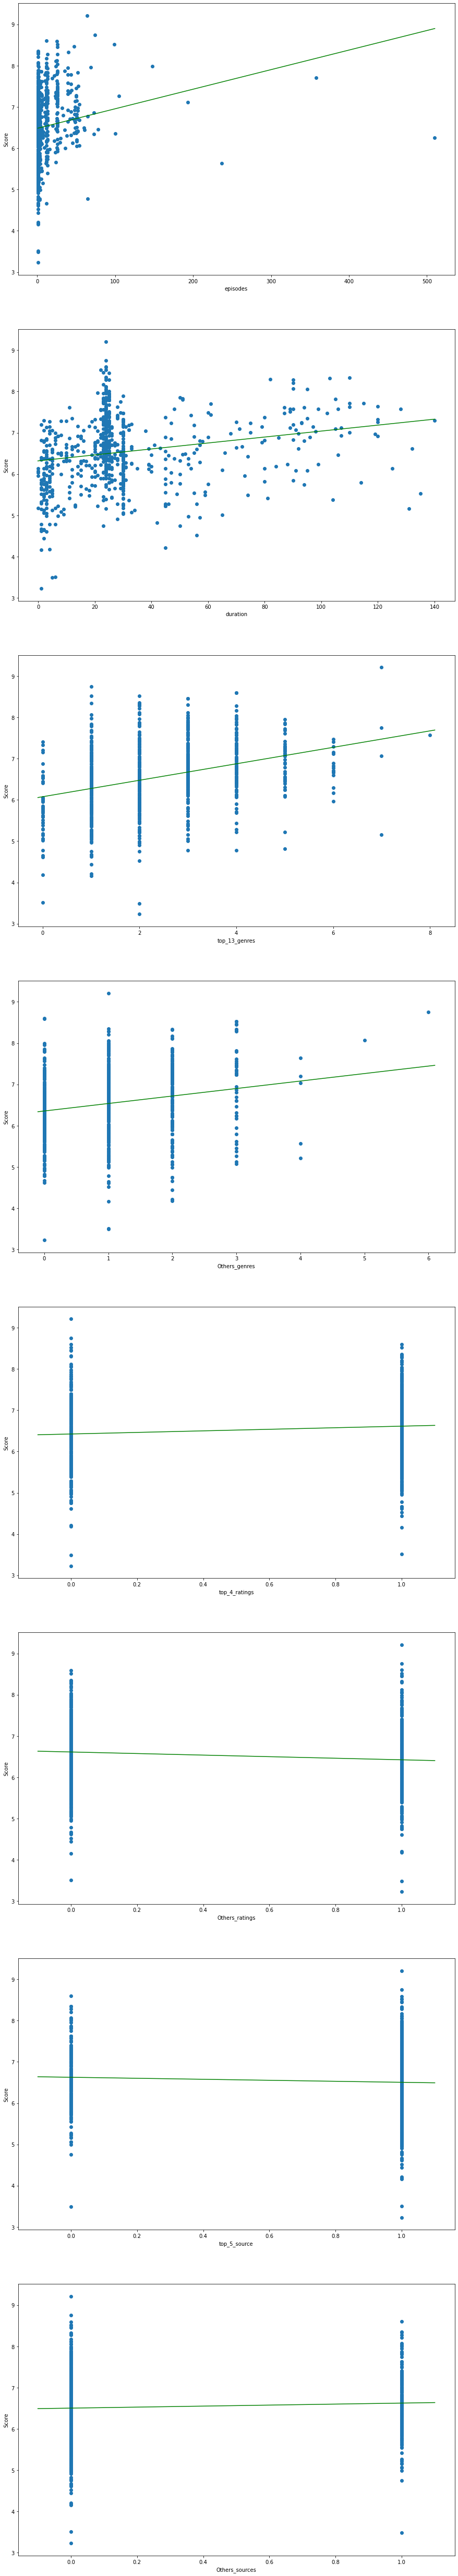

In [19]:
#Mo hinh hoa du lieu bang cach chon mo hinh toi uu cua 1 gia tri so voi ket qua
fig, axes = plt.subplots(len(funcX_after_change), 1,figsize=(15,90))
for i in range(len(funcX_after_change)):
    model_best = LinearRegression()
    model_best.fit(after_drop_col_X_train[:,i].reshape(-1,1),y_train)
    axes[i].scatter(after_drop_col_X_train[:,i],y_train)
    axes[i].set_xlabel(f'{funcX_after_change[i]}')
    axes[i].set_ylabel('Score')

    min_x = after_drop_col_X_train[:,i].min() - 0.1
    max_x = after_drop_col_X_train[:,i].max() + 0.1
    axes[i].plot([min_x, max_x], model_best.predict(np.array([[min_x], [max_x]])), color='g');

Text(0.5, 1.0, 'Val_error')

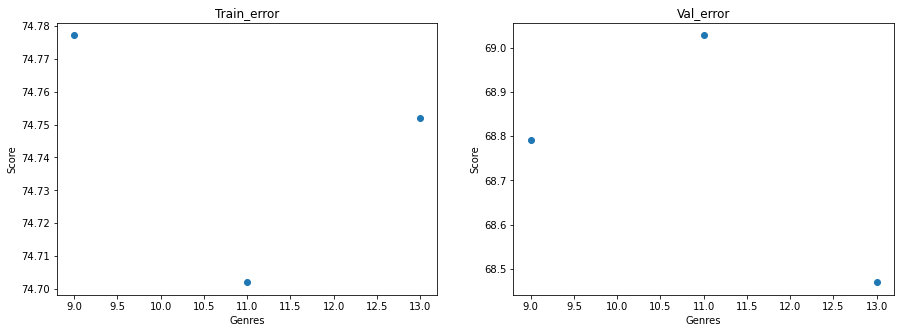

In [20]:
#Mo hinh hoa do loi cua tạp du lieu dua tren genres
train_errs_df = data=np.array(train_errs).reshape(len(top_), len(top_rating_), -1)            
val_errs_df = data=np.array(val_errs).reshape(len(top_), len(top_rating_), -1)
fig, axes = plt.subplots(1, 2,figsize=(15,5))
axes[0].scatter(top_,train_errs_df[:,0,0])
axes[0].set_xlabel('Genres')
axes[0].set_ylabel('Score')
axes[0].set_title('Train_error')
axes[1].scatter(top_,val_errs_df[:,0,0])
axes[1].set_xlabel('Genres')
axes[1].set_ylabel('Score')
axes[1].set_title('Val_error')

Text(0.5, 1.0, 'Val_error')

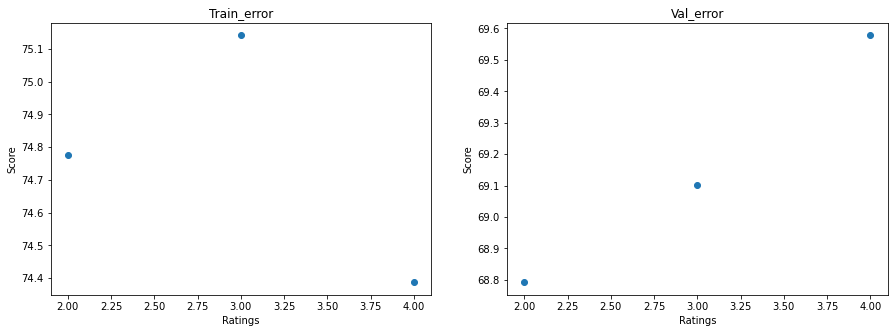

In [21]:
#Mo hinh hoa do loi cua tạp du lieu dua tren rating
fig, axes = plt.subplots(1, 2,figsize=(15,5))
axes[0].scatter(top_rating_,train_errs_df[0,:,0])
axes[0].set_xlabel('Ratings')
axes[0].set_ylabel('Score')
axes[0].set_title('Train_error')
axes[1].scatter(top_rating_,val_errs_df[0,:,0])
axes[1].set_xlabel('Ratings')
axes[1].set_ylabel('Score')
axes[1].set_title('Val_error')

Text(0.5, 1.0, 'Val_error')

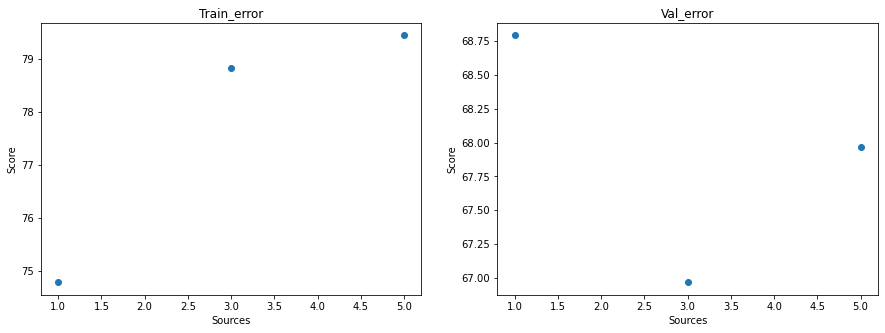

In [22]:
#Mo hinh hoa do loi cua tạp du lieu dua tren source
fig, axes = plt.subplots(1, 2,figsize=(15,5))
axes[0].scatter(top_source_,train_errs_df[0,0,:])
axes[0].set_xlabel('Sources')
axes[0].set_ylabel('Score')
axes[0].set_title('Train_error')
axes[1].scatter(top_source_,val_errs_df[0,0,:])
axes[1].set_xlabel('Sources')
axes[1].set_ylabel('Score')
axes[1].set_title('Val_error')

In [23]:
#Huan luyen mo hinh cuoi cung
full_pipeline.set_params(prep__col_trans__trans__cohe1__num_top_ = best_top_, 
                        prep__col_trans__trans__cohe2__num_top_rating_ = best_top_rating_, prep__col_trans__trans__cohe2__num_top_source_ = best_top_source_)
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 Pipeline(steps=[('col_trans',
                                  ColumnTransformer(transformers=[('trans',
                                                                   Pipeline(steps=[('drop1',
                                                                                    colDrop()),
                                                                                   ('cohe1',
                                                                                    customOneHotEncoder_1(num_top_=13)),
                                                                                   ('cohe2',
                                                                                    customOneHotEncoder_2(num_top_rating_=2,
                                                                                                          num_top_source_=3))]),
                                                                   Index(['genres', 'rating', 'source', 'episodes', 'duration', 'producers',
       'studios', 'favorites', 'scored_by'],
      dtype='object'))])),
                                 ('imputer', SimpleImputer())])),
                ('lnr', LinearRegression())])

In [24]:
#Tim w0 va w1-wn
coef = full_pipeline.named_steps['lnr'].coef_
intercept = full_pipeline.named_steps['lnr'].intercept_
print(coef)
print(intercept)

[ 0.00375387  0.00547268  0.16374442  0.17182933  0.07995858 -0.07995858
 -0.09867552  0.09867552]
5.808651696859117


In [25]:
#Tim ra cong thuc output duoc tinh theo input tu cong thuc nao
final_fomula = 'y = ' + f'{intercept}'
for i in range(len(coef)):
    final_fomula += ' + ' + f'{coef[i].round(5)}' + '*' + '(' +  funcX_after_change[i] + ')'
final_fomula

'y = 5.808651696859117 + 0.00375*(episodes) + 0.00547*(duration) + 0.16374*(top_13_genres) + 0.17183*(Others_genres) + 0.07996*(top_4_ratings) + -0.07996*(Others_ratings) + -0.09868*(top_5_source) + 0.09868*(Others_sources)'

In [26]:
#Kiem tra do loi r^2 tren tap test
baseline_preds = y_train.mean()
score = compute_rr(y_test, full_pipeline.predict(X_test), baseline_preds) 
print('Độ lỗi r^2 trên tập kiểm tra là ' + f'{((1-score)*100):.3f}' + '%')

Độ lỗi r^2 trên tập kiểm tra là 84.177%


In [27]:
'Finish'

'Finish'